In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('answers\data.csv')
data.head()
columnas = {
    'Marca temporal' : 'timestamp',
    'Carrera a la que perteneces.' : 'carrera',
    'Semestre que te encuentras cursando actualmente.' : 'semestre',
    'Selecciona el lenguaje de programación que mas sabes usar.' : 'lenguaje mas usado', #en esta linea despues de "selecciona el" hay dos espacios, cambiar en caso de que no cambie el nombre de la columna
    'Selecciona el lenguaje de programación que menos saber usar (sino no sabes usar ninguna de las opciones selecciona el que te parezca mas complicado de aprender).' : 'lenguaje menos usado',
    'Selecciona el o los lenguajes de programación que mas te gustarían aprender.' : 'lenguajes que te gustaría aprender'
}
data = data.rename(columns=columnas)
data.head()

,timestamp,carrera,semestre,lenguaje mas usado,lenguaje menos usado,lenguajes que te gustaría aprender
0,2024/02/25 6:12:27 p. m. GMT-7,Ingeniería en Software.,5-6 semestre,Python,JavaScript,JavaScript
1,2024/02/28 4:57:44 p. m. GMT-7,Ingeniería en Software.,1-2 semestre,Java,Java,Java
2,2024/02/28 8:59:59 p. m. GMT-7,Ingeniería en Software.,5-6 semestre,Python,C#,JavaScript;C#
3,2024/02/29 10:10:24 a. m. GMT-7,Ingenieria en Sitemas Computacionales.,9 semestre o mayor,PHP,Java,C#
4,2024/02/29 10:12:49 a. m. GMT-7,Ingeniería en Software.,5-6 semestre,C#,Python,JavaScript;Python;Java


Numero total de cuantos usan los lenguajes especificados

In [5]:
lenguageMostUsed = data['lenguaje mas usado'].value_counts()
lenguageMostUsedPorcentual = data['lenguaje mas usado'].value_counts(normalize=True) * 100
lenguageMostUsedPorcentual = lenguageMostUsedPorcentual.round(2)
lenguageMostUsedPorcentual


lenguaje mas usado
Python        38.46
C#            35.90
JavaScript    15.38
Java           7.69
PHP            2.56
Name: proportion, dtype: float64

In [6]:
porcentual = pd.crosstab(data.carrera, data['lenguaje menos usado'], normalize = 'index') * 100
porcentual

lenguaje menos usado,C#,Java,JavaScript,PHP,Python
carrera,,,,,
Ingenieria en Sitemas Computacionales.,15.384615,15.384615,7.692308,30.769231,30.769231
Ingeniería en Software.,19.230769,15.384615,15.384615,30.769231,19.230769


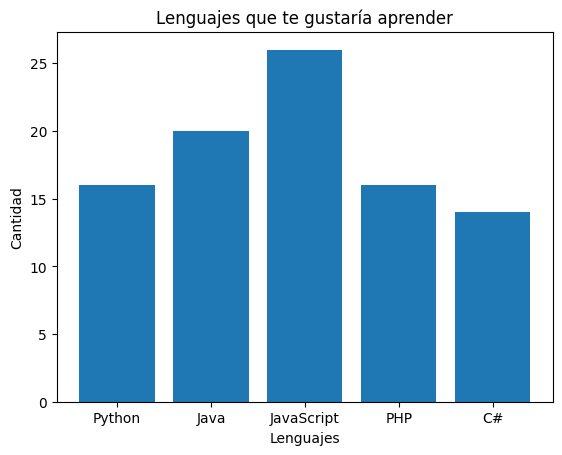

In [46]:
pyhon_count = data['lenguajes que te gustaría aprender'].str.contains('Python').sum()
java_count = data['lenguajes que te gustaría aprender'].str.contains(r'\bJava\b').sum()
javascript_count = data['lenguajes que te gustaría aprender'].str.contains('JavaScript').sum()
php_count = data['lenguajes que te gustaría aprender'].str.contains('PHP').sum()
csharp_count = data['lenguajes que te gustaría aprender'].str.contains('C#').sum()

lenguajes = ['Python', 'Java', 'JavaScript', 'PHP', 'C#']
cantidad = [pyhon_count, java_count, javascript_count, php_count, csharp_count]

plt.bar(lenguajes, cantidad)
plt.title('Lenguajes que te gustaría aprender')
plt.xlabel('Lenguajes')
plt.ylabel('Cantidad')
plt.show()
